In [1703]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [1704]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1705]:
df.shape

(1460, 81)

In [1706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### We will now perform data cleaning, handle null values, remove unnecessary columns, change variable types if necessary and remove outliers

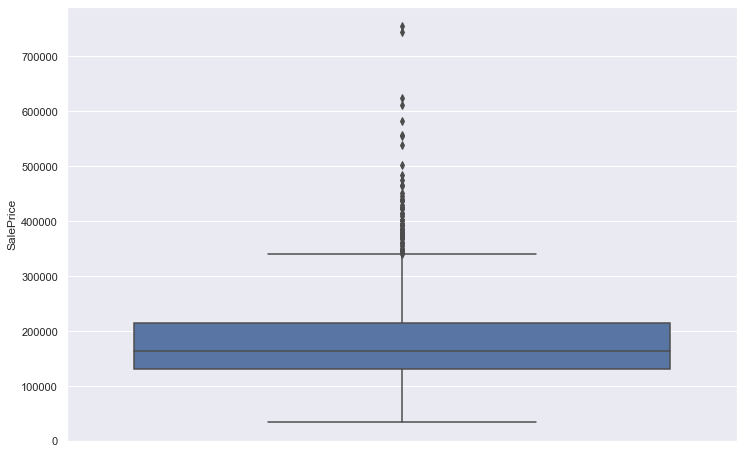

In [1707]:
sns.set(rc={'figure.figsize' : (12,8)})
sns.boxplot(y = df["SalePrice"])
plt.show()

In [1708]:
# removing the outliers from the SalePrice
df = df[df["SalePrice"] < 310000]

In [1709]:
df["MSSubClass"].value_counts()

20     492
60     253
50     140
120     81
30      69
160     63
70      58
80      57
90      52
190     30
85      20
75      14
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

`This is a categorical variable, let's replace its values by actual categories from data dictionary`

In [1710]:
def ChangeSubClass(x):
    if x == 20:
        return "1-story-1946"
    elif x == 30:
        return "1-story-1945"
    elif x == 40:
        return "1-story-attic"
    elif x == 45:
        return "1-1/2-story-unfinished"
    elif x == 50:
        return "1-1/2-story-finished"
    elif x == 60:
        return "2-story-1946"
    elif x == 70:
        return "2-story-1945"
    elif x == 75:
        return "2-1/2-story"
    elif x == 80:
        return "split or multi"
    elif x == 85:
        return "split foyer"
    elif x == 90:
        return "duplex"
    elif x == 120:
        return "1-story-PUD"
    elif x == 150:
        return "1-1/2-story-PUD"
    elif x == 160:
        return "2-story-PUD"
    elif x == 180:
        return "PUD-multilevel"
    else:
        return "2-family-conversion"

df["MSSubClass"] = df["MSSubClass"].apply(ChangeSubClass)
df["MSSubClass"].value_counts()

1-story-1946              492
2-story-1946              253
1-1/2-story-finished      140
1-story-PUD                81
1-story-1945               69
2-story-PUD                63
2-story-1945               58
split or multi             57
duplex                     52
2-family-conversion        30
split foyer                20
2-1/2-story                14
1-1/2-story-unfinished     12
PUD-multilevel             10
1-story-attic               4
Name: MSSubClass, dtype: int64

In [1711]:
df["LotFrontage"].value_counts()

60.0     142
70.0      69
80.0      66
50.0      56
75.0      51
        ... 
141.0      1
33.0       1
112.0      1
108.0      1
46.0       1
Name: LotFrontage, Length: 107, dtype: int64

In [1712]:
# Replacing nul values with mode
values = {"LotFrontage": 60.0}
df.fillna(values, inplace=True)

In [1713]:
df["Street"].value_counts()

Pave    1349
Grvl       6
Name: Street, dtype: int64

`Remove 'Street' variable since more than 99% of the rows have same value for this variable`

In [1714]:
df.drop(labels=["Street"], axis=1, inplace=True)

In [1715]:
df["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [1716]:
values = {"Alley": "None"} # Replacing null values with mode
df.fillna(values, inplace=True)

In [1717]:
# Updating the categorical values - replacing integer encoding by actual categorical values as given in data dictionary
def UpdateOverallQualAndCond(x):
    if x == 1:
        return "Very Poor"
    elif x == 2:
        return "Poor"
    elif x == 3:
        return "Fair"
    elif x == 4:
        return "Below avg"
    elif x == 5:
        return "Avg"
    elif x == 6:
        return "Above avg"
    elif x == 7:
        return "Good"
    elif x == 8:
        return "Very good"
    elif x == 9:
        return "Excellent"
    else:
        return "Very excellent"

df["OverallQual"] = df["OverallQual"].apply(UpdateOverallQualAndCond)

In [1718]:
df["OverallCond"] = df["OverallCond"].apply(UpdateOverallQualAndCond)

In [1719]:
df["MasVnrType"].value_counts()

None       845
BrkFace    394
Stone       94
BrkCmn      15
Name: MasVnrType, dtype: int64

In [1720]:
values = {"MasVnrType": "None"} # Replacing null values with mode
df.fillna(values, inplace=True)

In [1721]:
values = {"MasVnrArea": 0} # Replacing null values with mode
df.fillna(values, inplace=True)

In [1722]:
df["BsmtQual"].value_counts()

TA    645
Gd    587
Ex     51
Fa     35
Name: BsmtQual, dtype: int64

In [1723]:
df[df["BsmtQual"].isnull()].shape

(37, 80)

In [1724]:
values = {"BsmtQual": "TA"} # Replacing null values with mode
df.fillna(values, inplace=True)

In [1725]:
df["BsmtCond"].value_counts()

TA    1214
Gd      57
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [1726]:
df[df["BsmtCond"].isnull()].shape

(37, 80)

In [1727]:
values = {"BsmtCond": "TA"} # Replacing null values with mode
df.fillna(values, inplace=True)

In [1728]:
df["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [1729]:
df["BsmtExposure"].value_counts()

No    921
Av    195
Mn    103
Gd     98
Name: BsmtExposure, dtype: int64

In [1730]:
values = {"BsmtExposure": "No"} # Replacing null values with mode
df.fillna(values, inplace=True)

In [1731]:
df["BsmtFinType1"].value_counts()

Unf    410
GLQ    339
ALQ    218
BLQ    146
Rec    131
LwQ     74
Name: BsmtFinType1, dtype: int64

In [1732]:
values = {"BsmtFinType1": "Unf"} # Replacing null values with mode
df.fillna(values, inplace=True)

In [1733]:
df["BsmtFinType2"].value_counts()

Unf    1154
Rec      52
LwQ      46
BLQ      33
ALQ      18
GLQ      14
Name: BsmtFinType2, dtype: int64

In [1734]:
values = {"BsmtFinType2": "Unf"} # Replacing null values with mode
df.fillna(values, inplace=True)

In [1735]:
df[df["Electrical"].isnull()].shape

(1, 80)

In [1736]:
df["Electrical"].value_counts()

SBrkr    1229
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1737]:
values = {"Electrical": "SBrkr"} # Replacing null values with mode
df.fillna(values, inplace=True)

In [1738]:
df["FireplaceQu"].value_counts()

Gd    315
TA    290
Fa     33
Po     20
Ex     10
Name: FireplaceQu, dtype: int64

In [1739]:
values = {"FireplaceQu": "None"} # Replacing null values with "None" string - a new category - indicating the house doesn't have a fire place
df.fillna(values, inplace=True)

`We will handle all the garage related columns together`

In [1740]:
# get all garage related columns
garageInfoCols = list(filter(lambda x: x.find("Garage") != -1, df.columns))

In [1741]:
df[df["GarageYrBlt"].isnull()][garageInfoCols].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN


`If garage built year is `null` shows other garage columns are also null/0, which indicates house doesn't have a garage`

In [1742]:
# deriving new metric indicating whether the house a garage or not
df["GaragePresent"] = df["GarageYrBlt"].apply(lambda x: 0 if pd.isnull(x) else 1)
df["GaragePresent"].value_counts()

1    1274
0      81
Name: GaragePresent, dtype: int64

In [1743]:
df["GarageYrBlt"].value_counts()

2005.0    56
2004.0    47
2003.0    45
2006.0    45
2007.0    37
          ..
2010.0     1
1934.0     1
1908.0     1
1900.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [1744]:
# We are not going to replace garageYrBlt null values with NA. Instead, we will replace it 
# with the oldest garage built year present in the whole data. We are assuming a house with no garage is equivalent to a 
# house with a very old garage.

# We are not putting NA because we are not going to take garageYrBlt as it is while creating the model
# Rather going forward, we will create a derived column, where we calculate whether a house has a garage
# with < 20 yrs old garage, 20-40 yrs old garage, 40-60 yrs old garage and so on. That's why we are replacing the null
# values with something that can make sense while creating the derived metric
values = {"GarageYrBlt": 1933.0}
df.fillna(values, inplace=True)

In [1745]:
df["GarageFinish"].value_counts()

Unf    597
RFn    397
Fin    280
Name: GarageFinish, dtype: int64

In [1746]:
values = {"GarageFinish": "NA"}
df.fillna(values, inplace=True)

In [1747]:
df["GarageQual"].value_counts()

TA    1209
Fa      48
Gd      12
Po       3
Ex       2
Name: GarageQual, dtype: int64

In [1748]:
values = {"GarageQual": "NA"}
df.fillna(values, inplace=True)

In [1749]:
df["GarageCond"].value_counts()

TA    1221
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [1750]:
values = {"GarageCond": "NA"}
df.fillna(values, inplace=True)

In [1751]:
df["GarageType"].value_counts()

Attchd     789
Detchd     384
BuiltIn     68
Basment     18
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [1752]:
values = {"GarageType": "NA"}
df.fillna(values, inplace=True)

In [1753]:
df["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    1
Name: PoolQC, dtype: int64

In [1754]:
df.drop(labels=["PoolQC"], axis=1, inplace=True)

In [1755]:
df["Fence"].value_counts()

MnPrv    155
GdPrv     58
GdWo      53
MnWw      11
Name: Fence, dtype: int64

In [1756]:
values = {"Fence": "None"}
df.fillna(values, inplace=True)

In [1757]:
df["MiscFeature"].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [1758]:
values = {"MiscFeature": "None"}
df.fillna(values, inplace=True)

In [1759]:
# Function for creating categories from 'year' containing variables like "YearBuilt", "GarageyrBlt"
def deriveAgeCat(x):
    if x >= 2002:
        return "Lt 20 years"
    elif x >= 1982:
        return "Lt 40 years"
    elif x >= 1962:
        return "Lt 60 years"
    elif x >= 1942:
        return "Lt 80 years"
    else:
        return "Mt 80 years"

df["AgeCat"] = df["YearBuilt"].apply(deriveAgeCat)
df["GarageYrCat"] = df["GarageYrBlt"].apply(deriveAgeCat)
print(df["GarageYrCat"].value_counts())  
print(df["AgeCat"].value_counts())

Lt 60 years    361
Lt 20 years    286
Lt 40 years    284
Lt 80 years    213
Mt 80 years    211
Name: GarageYrCat, dtype: int64
Lt 60 years    344
Lt 20 years    275
Mt 80 years    266
Lt 80 years    243
Lt 40 years    227
Name: AgeCat, dtype: int64


In [1760]:
def MonthsSinceSale(x): # Number of months since the house was sold
    years = 2022 - x["YrSold"]
    months = 12 - x["MoSold"]
    return years*12 + months

df["MonthsSinceSale"] = df.apply(MonthsSinceSale,axis=1)
df["MonthsSinceSale"].unique()

array([178, 187, 171, 202, 168, 158, 184, 157, 176, 179, 175, 185, 153,
       194, 174, 163, 186, 151, 161, 192, 173, 152, 195, 162, 155, 180,
       199, 160, 191, 190, 196, 189, 182, 166, 149, 150, 197, 156, 201,
       170, 200, 165, 181, 164, 154, 172, 159, 188, 177, 167, 198, 203,
       193, 169, 183], dtype=int64)

`Creating another variable which tells whether the house has even been remodeled`

In [1761]:
def isRemodelled(x):
    if x["YearBuilt"] == x["YearRemodAdd"]:
        return 1
    else:
        return 0

df["isRemodel"] = df.apply(isRemodelled, axis=1)
df["isRemodel"].value_counts()

1    720
0    635
Name: isRemodel, dtype: int64

`Remove columns which are either not required or we have created meaningful derived metrics out of them`

In [1762]:
colsToDel = ["YearBuilt","YearRemodAdd","YrSold","MoSold","GarageYrBlt","Id"]
df.drop(labels=colsToDel, axis=1, inplace=True)

In [1763]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,GaragePresent,AgeCat,GarageYrCat,MonthsSinceSale,isRemodel
0,2-story-1946,RL,65.0,8450,None,Reg,Lvl,AllPub,Inside,Gtl,...,None,0,WD,Normal,208500,1,Lt 20 years,Lt 20 years,178,1
1,1-story-1946,RL,80.0,9600,None,Reg,Lvl,AllPub,FR2,Gtl,...,None,0,WD,Normal,181500,1,Lt 60 years,Lt 60 years,187,1
2,2-story-1946,RL,68.0,11250,None,IR1,Lvl,AllPub,Inside,Gtl,...,None,0,WD,Normal,223500,1,Lt 40 years,Lt 40 years,171,0
3,2-story-1945,RL,60.0,9550,None,IR1,Lvl,AllPub,Corner,Gtl,...,None,0,WD,Abnorml,140000,1,Mt 80 years,Lt 40 years,202,0
4,2-story-1946,RL,84.0,14260,None,IR1,Lvl,AllPub,FR2,Gtl,...,None,0,WD,Normal,250000,1,Lt 40 years,Lt 40 years,168,1


In [1764]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1355 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1355 non-null   object 
 1   MSZoning         1355 non-null   object 
 2   LotFrontage      1355 non-null   float64
 3   LotArea          1355 non-null   int64  
 4   Alley            1355 non-null   object 
 5   LotShape         1355 non-null   object 
 6   LandContour      1355 non-null   object 
 7   Utilities        1355 non-null   object 
 8   LotConfig        1355 non-null   object 
 9   LandSlope        1355 non-null   object 
 10  Neighborhood     1355 non-null   object 
 11  Condition1       1355 non-null   object 
 12  Condition2       1355 non-null   object 
 13  BldgType         1355 non-null   object 
 14  HouseStyle       1355 non-null   object 
 15  OverallQual      1355 non-null   object 
 16  OverallCond      1355 non-null   object 
 17  RoofStyle     

`As seen from info data above, we we have handled all the null values`

In [1765]:
objCols = list(df.select_dtypes(include=['object']).columns)

`Append column names to the categorical values. The reason for doing this is explained in the below code comment`

In [1766]:
# This is a crucial step. Here we are appending all the values inside categorical columns with the column name
# Old value under column X  = "Good"
# New value will be "X_Good"
# Why are we doing this? We are going to create dummy variables from categorical columns, and since a lot of 
# categorical columns contain identical values like 'Excellent', 'Good' etc. Thedummy variables will be crrated like 'Good_1',
# 'Good_2' etc and it will be difficult to understand these values are from which columns.
# Instead 'Col1_Good' or 'Col2_Good' is easier to read and understand
for col in objCols:
    df[col] = df[col].apply(lambda x: col + " " + x)

In [1767]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,GaragePresent,AgeCat,GarageYrCat,MonthsSinceSale,isRemodel
0,MSSubClass 2-story-1946,MSZoning RL,65.0,8450,Alley None,LotShape Reg,LandContour Lvl,Utilities AllPub,LotConfig Inside,LandSlope Gtl,...,MiscFeature None,0,SaleType WD,SaleCondition Normal,208500,1,AgeCat Lt 20 years,GarageYrCat Lt 20 years,178,1
1,MSSubClass 1-story-1946,MSZoning RL,80.0,9600,Alley None,LotShape Reg,LandContour Lvl,Utilities AllPub,LotConfig FR2,LandSlope Gtl,...,MiscFeature None,0,SaleType WD,SaleCondition Normal,181500,1,AgeCat Lt 60 years,GarageYrCat Lt 60 years,187,1
2,MSSubClass 2-story-1946,MSZoning RL,68.0,11250,Alley None,LotShape IR1,LandContour Lvl,Utilities AllPub,LotConfig Inside,LandSlope Gtl,...,MiscFeature None,0,SaleType WD,SaleCondition Normal,223500,1,AgeCat Lt 40 years,GarageYrCat Lt 40 years,171,0
3,MSSubClass 2-story-1945,MSZoning RL,60.0,9550,Alley None,LotShape IR1,LandContour Lvl,Utilities AllPub,LotConfig Corner,LandSlope Gtl,...,MiscFeature None,0,SaleType WD,SaleCondition Abnorml,140000,1,AgeCat Mt 80 years,GarageYrCat Lt 40 years,202,0
4,MSSubClass 2-story-1946,MSZoning RL,84.0,14260,Alley None,LotShape IR1,LandContour Lvl,Utilities AllPub,LotConfig FR2,LandSlope Gtl,...,MiscFeature None,0,SaleType WD,SaleCondition Normal,250000,1,AgeCat Lt 40 years,GarageYrCat Lt 40 years,168,1


In [1768]:
numCols = list(df.select_dtypes(include=['int64','float64']).columns)

In [1769]:
len(numCols)

32

In [1770]:
numCols.remove('SalePrice')
len(numCols)

31

`Let's check out the relationship of each variable with the target variable. We will start with plotting scatter plots of numerical columns with the target variable`

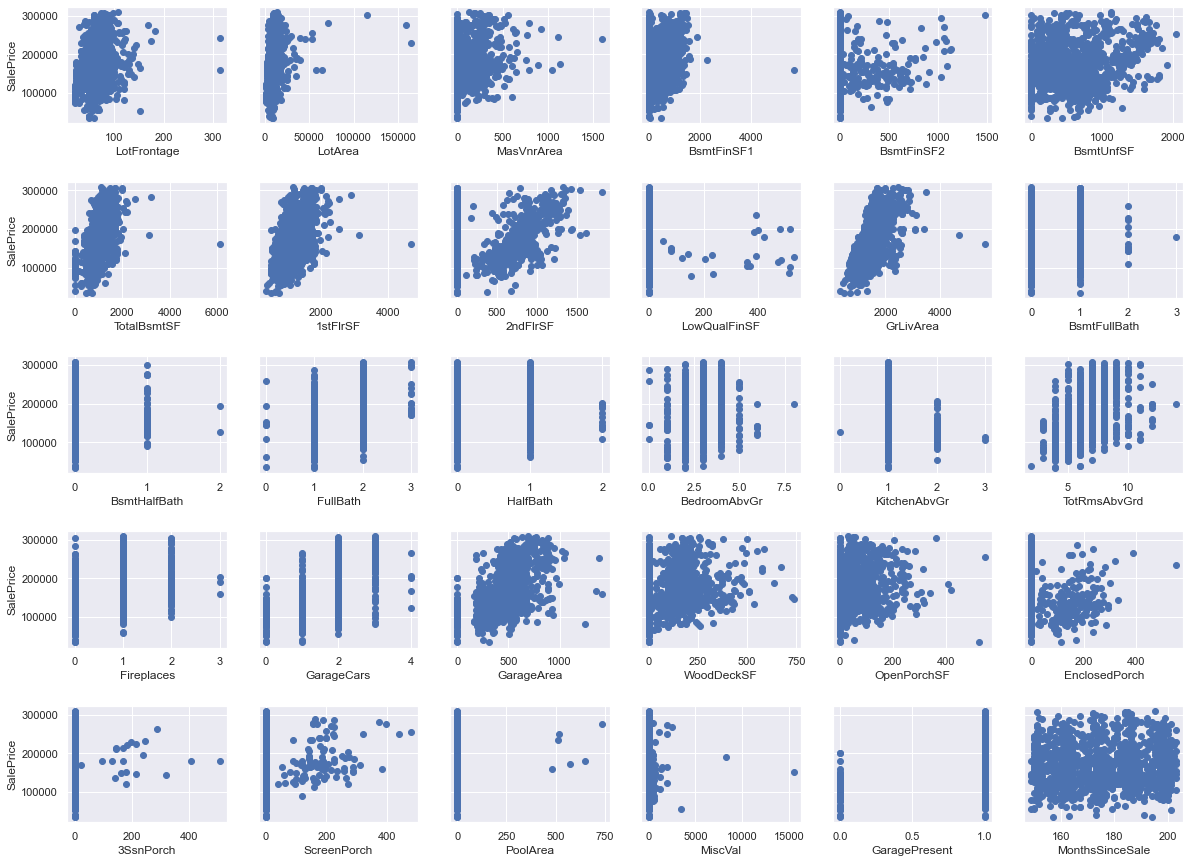

In [1771]:
sns.set(rc={'figure.figsize':(20,15)})
fig, ax = plt.subplots(nrows=5,ncols=6,sharey=True)
index = 0
for rows in range(0,5):
    for cols in range(0,6):
        ax[rows,cols].scatter(df[numCols[index]],df["SalePrice"])
        ax[rows,cols].set_xlabel(numCols[index])
        if cols == 0:
            ax[rows,cols].set_ylabel("SalePrice")
        index = index + 1
plt.subplots_adjust(hspace=0.5)
plt.show()

`Some variables does look linearly related with SalePrice. We don't get any indication if we need to transform any of the predictor or response variable`

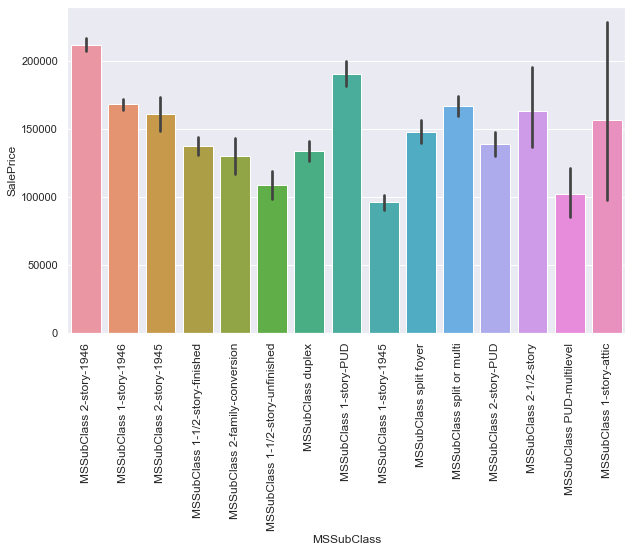

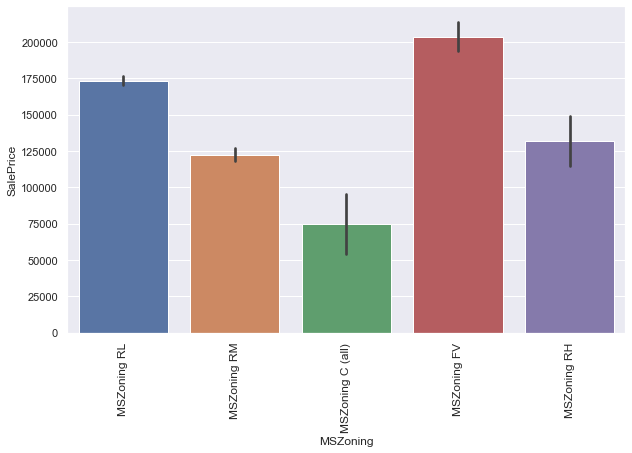

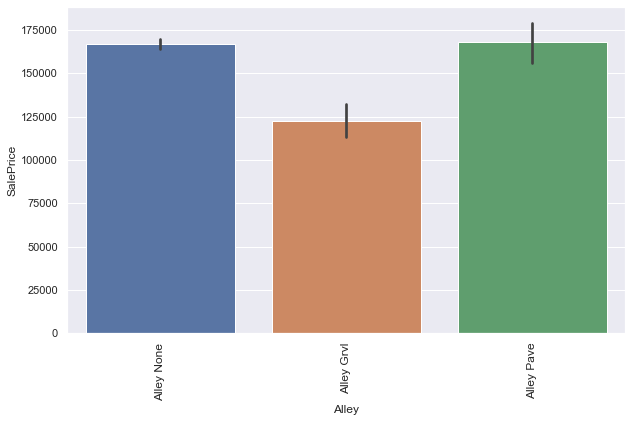

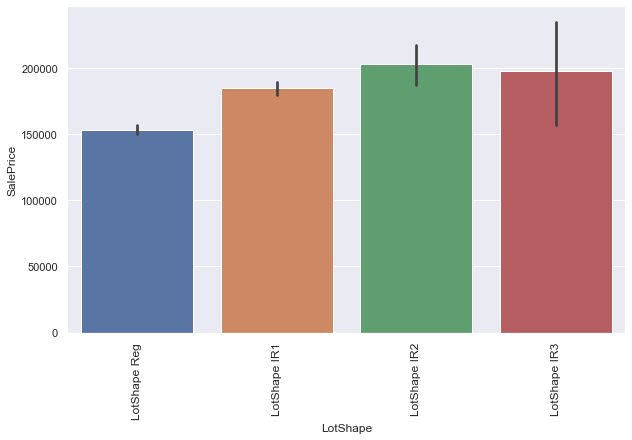

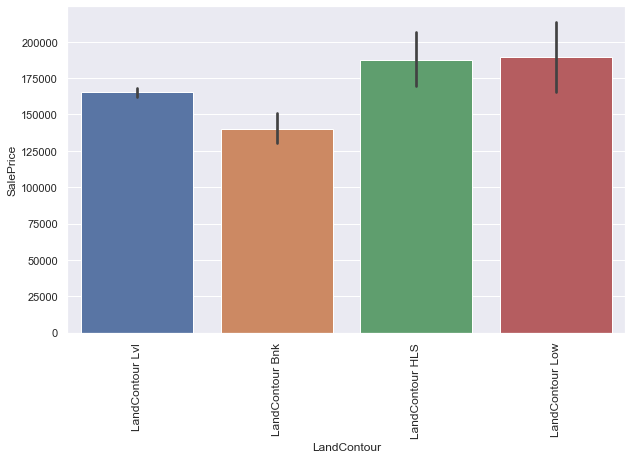

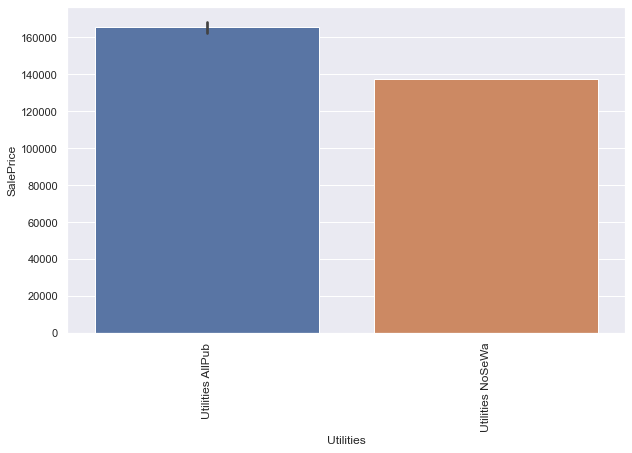

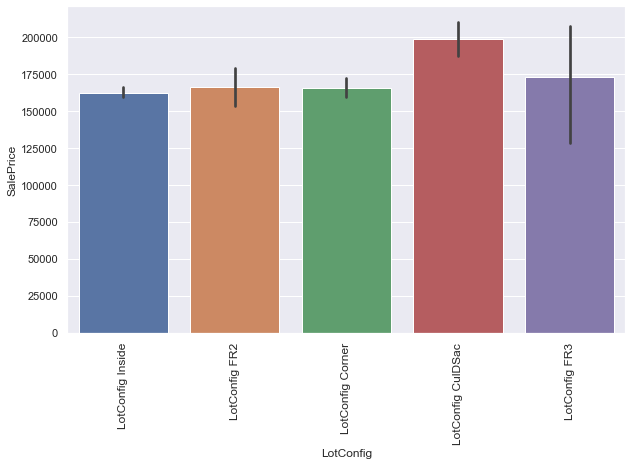

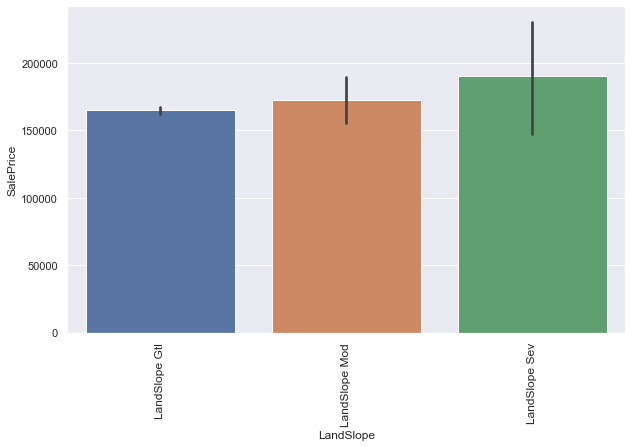

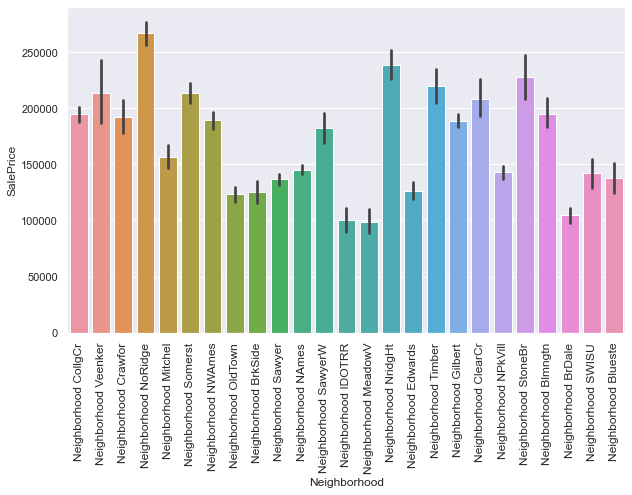

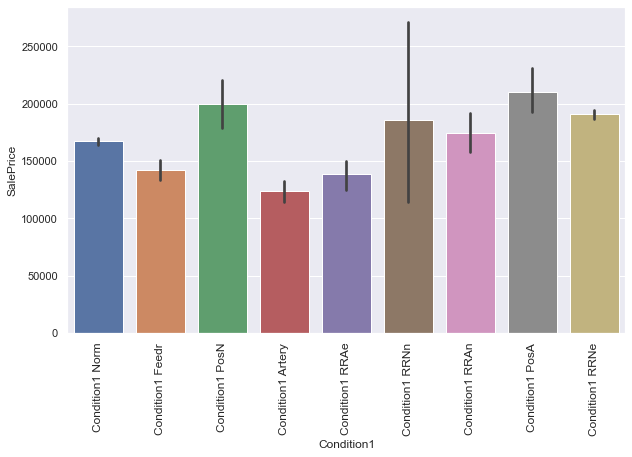

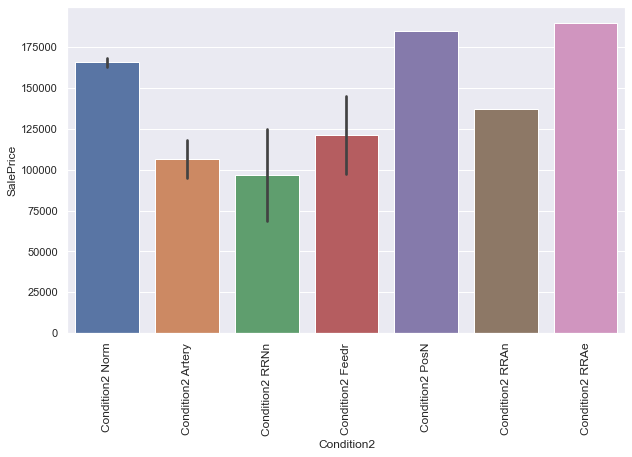

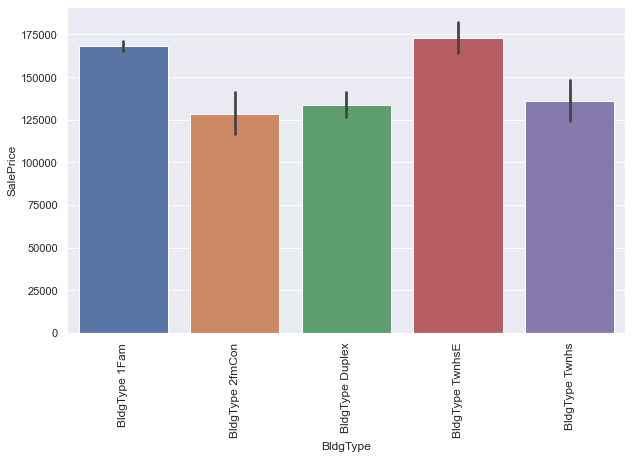

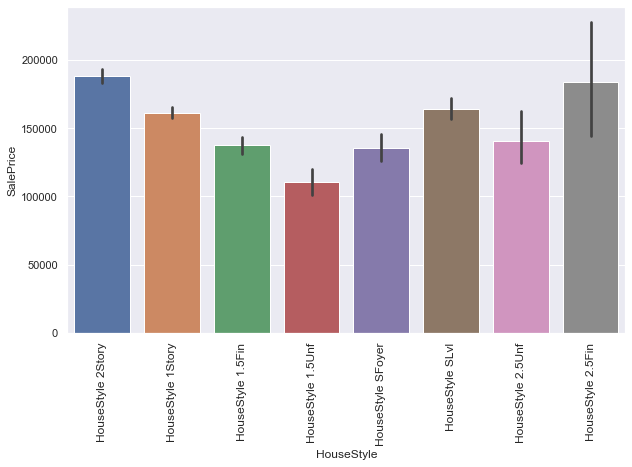

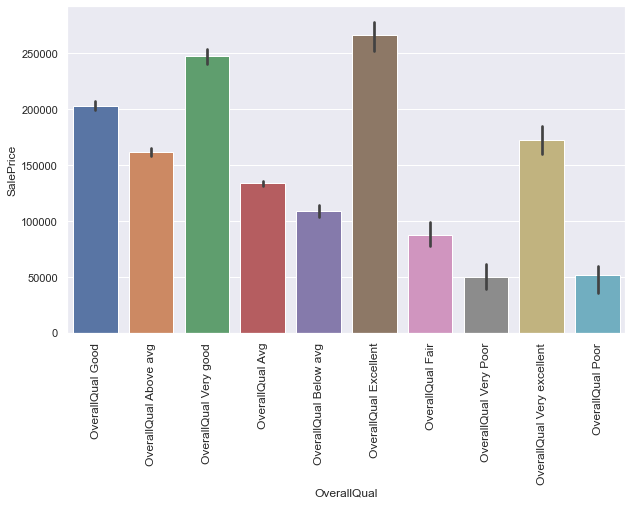

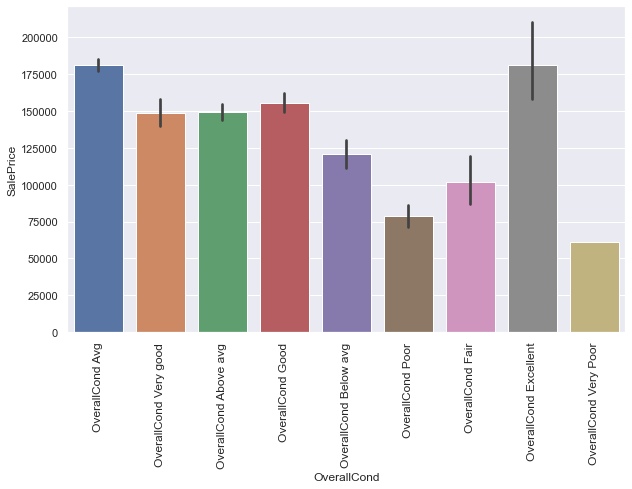

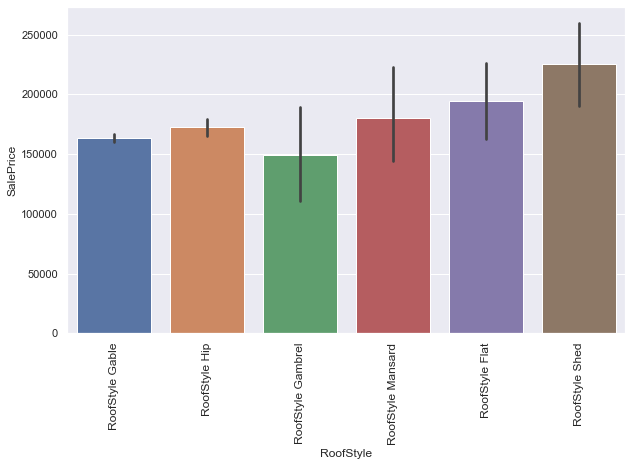

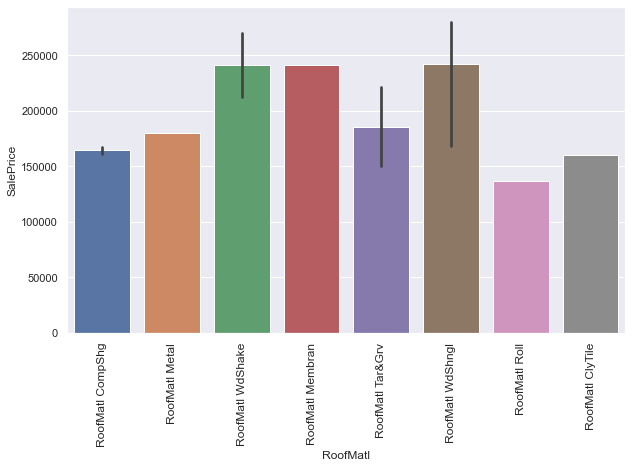

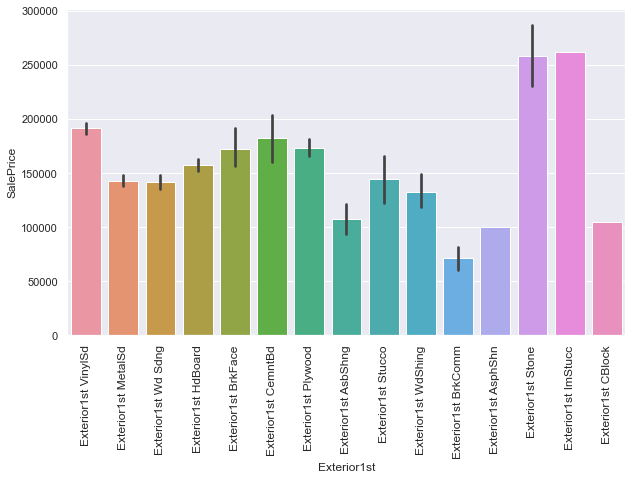

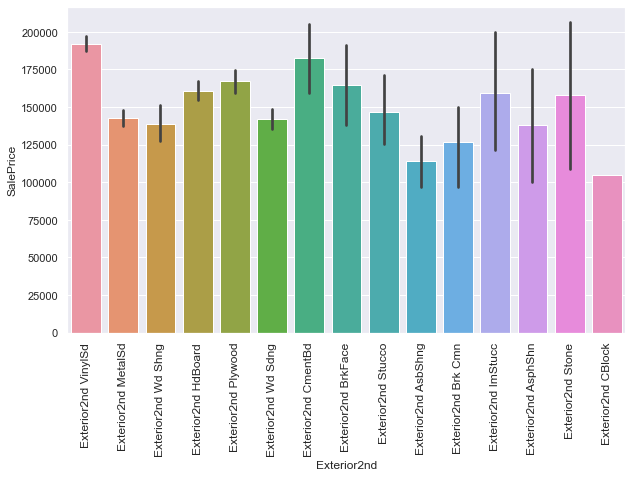

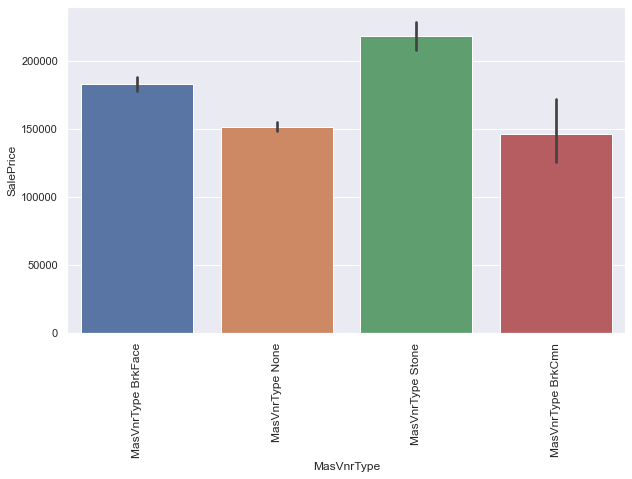

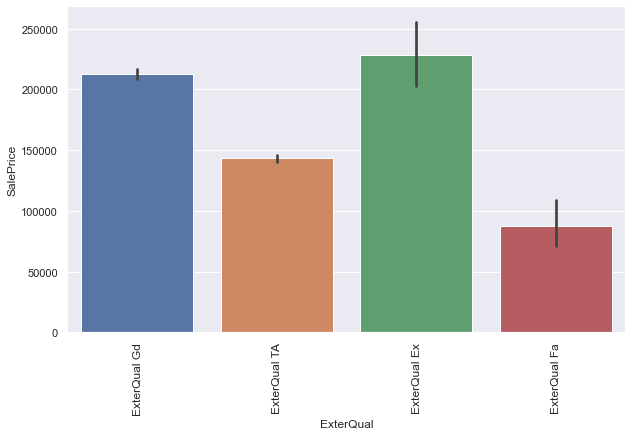

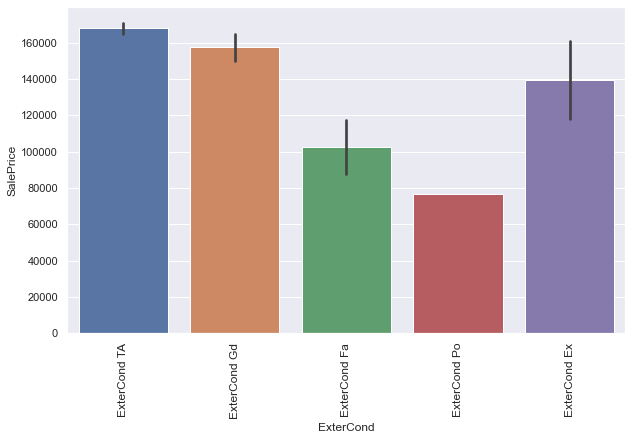

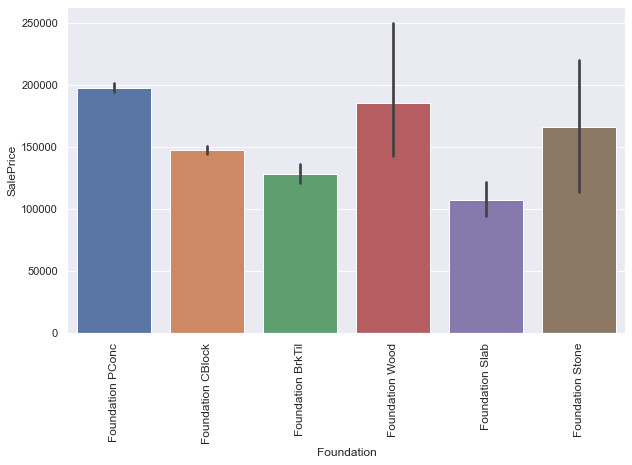

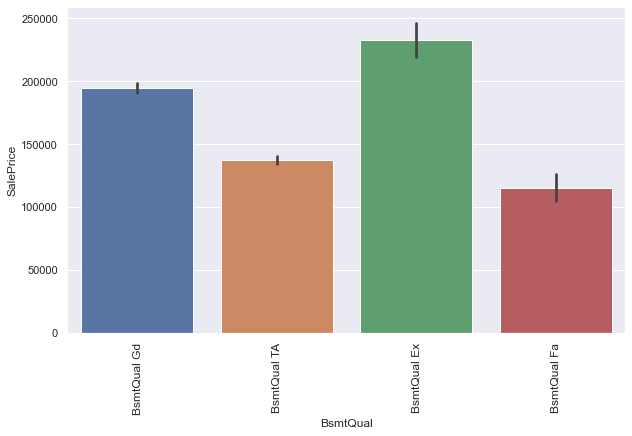

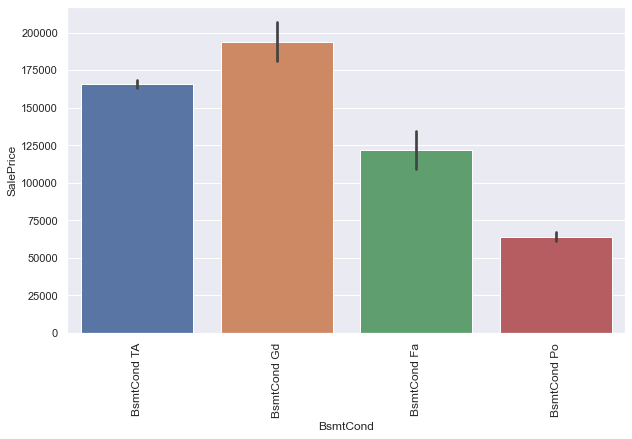

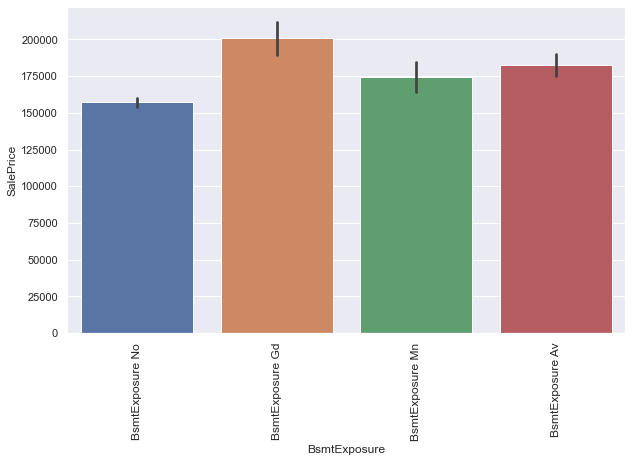

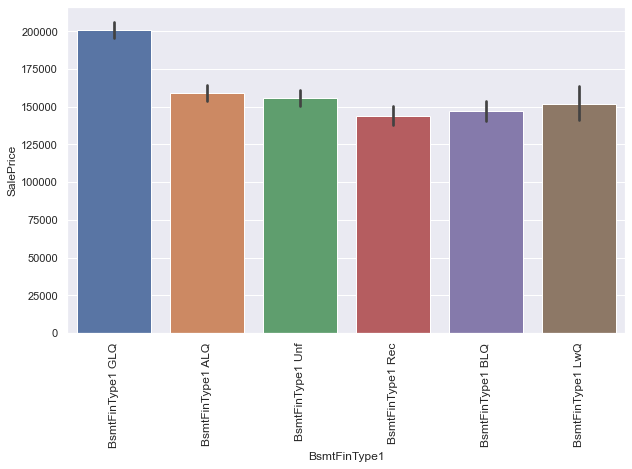

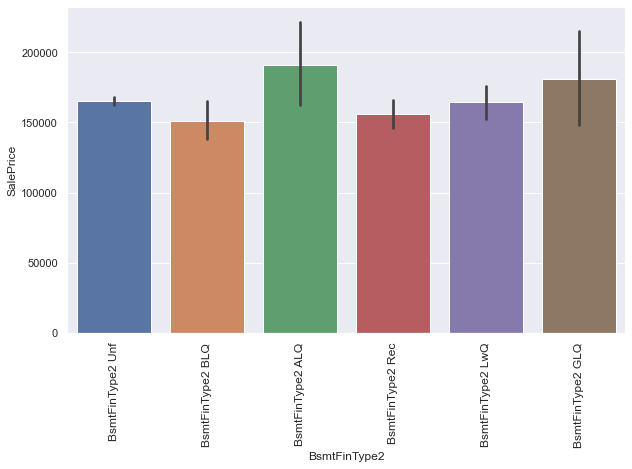

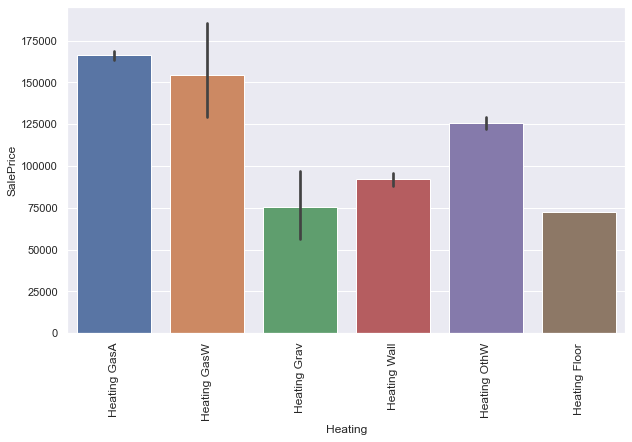

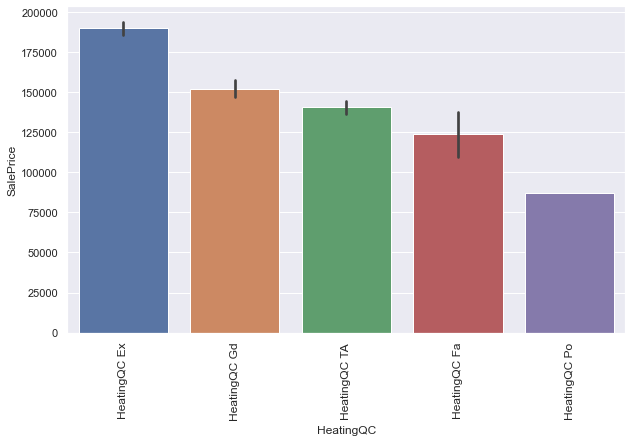

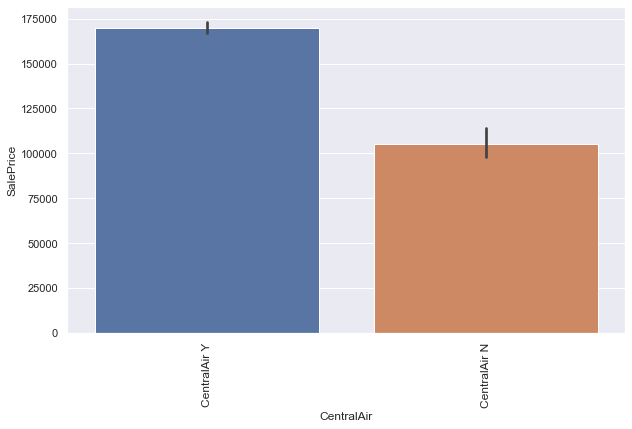

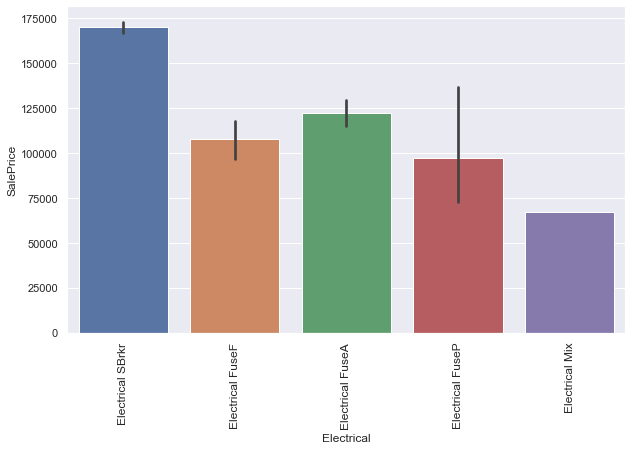

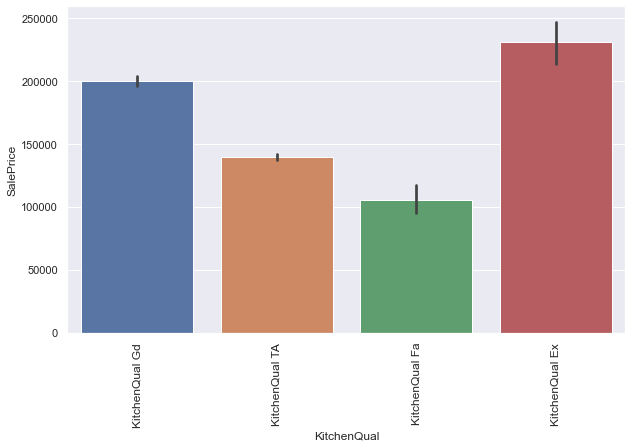

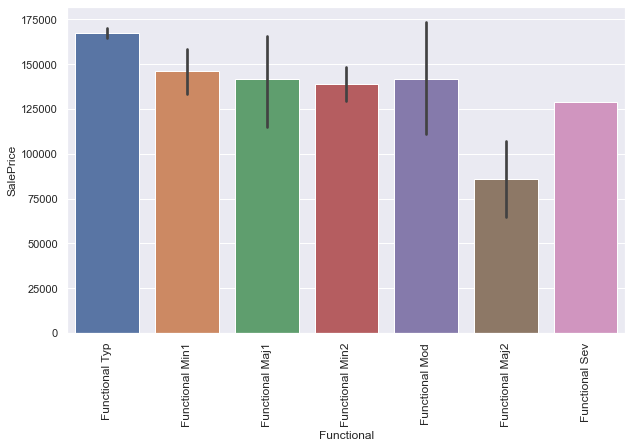

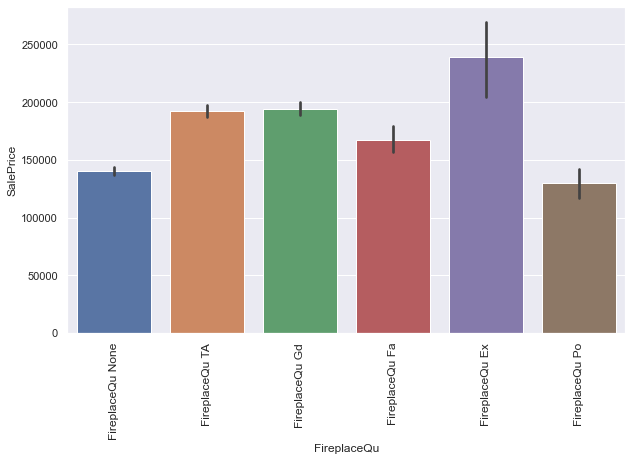

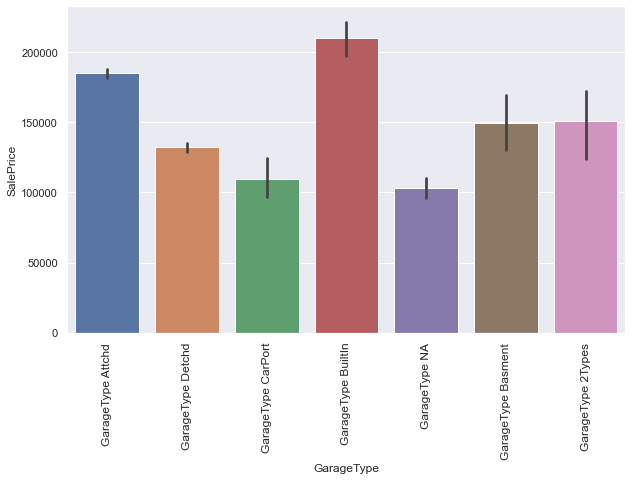

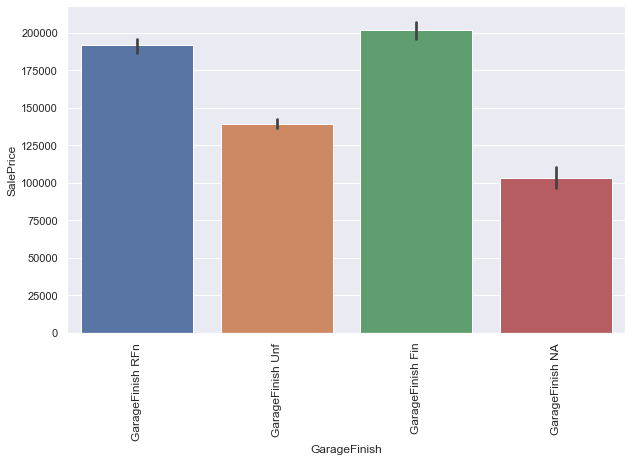

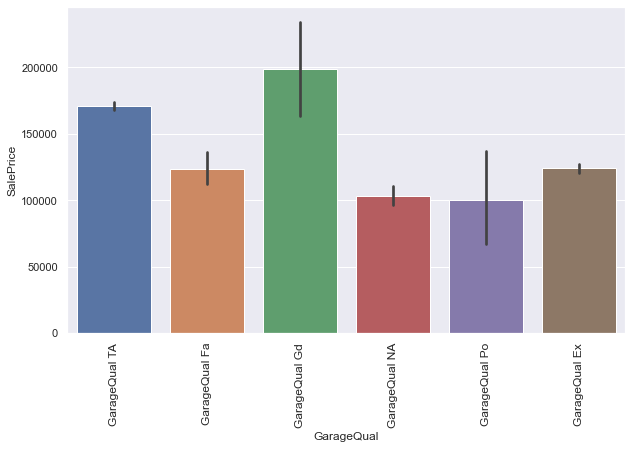

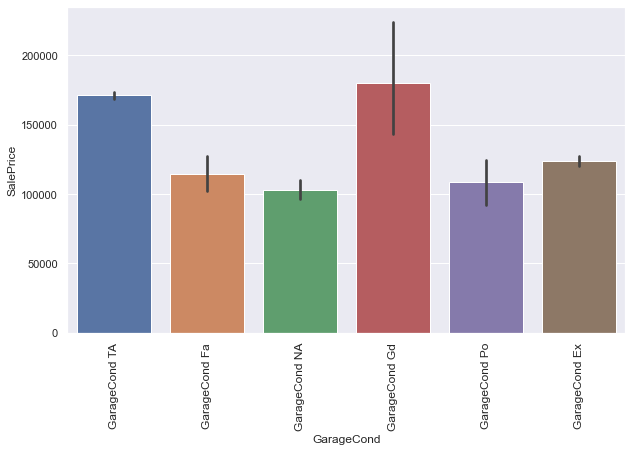

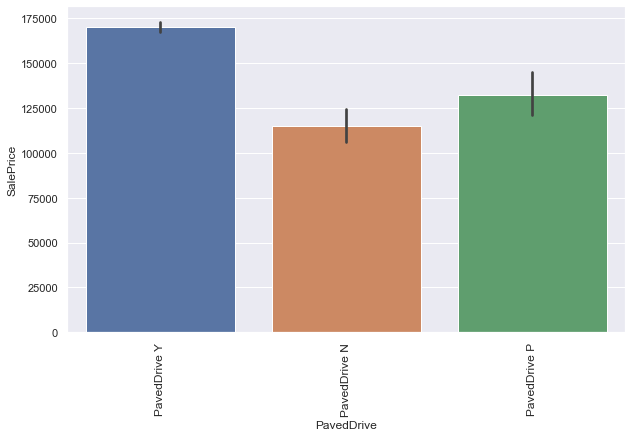

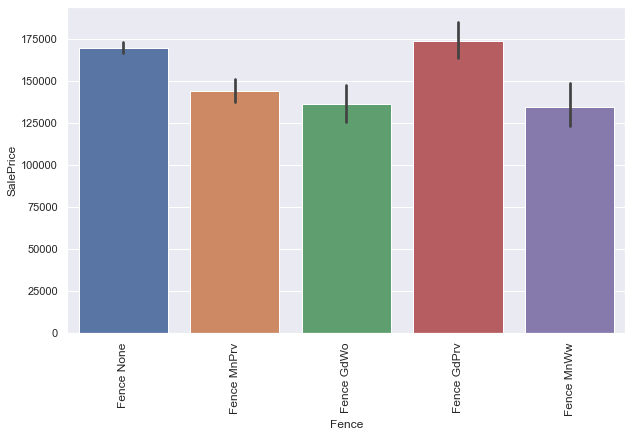

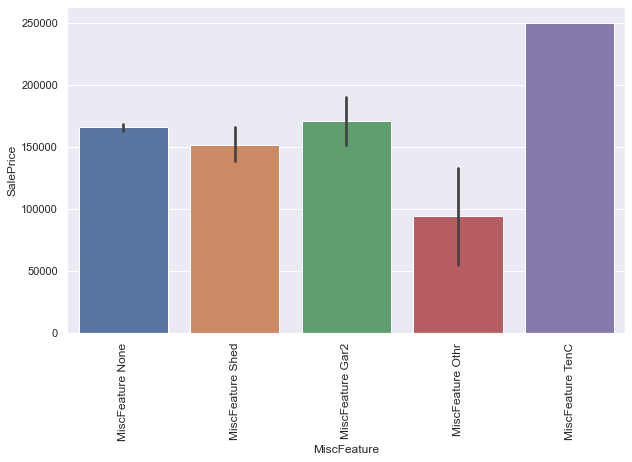

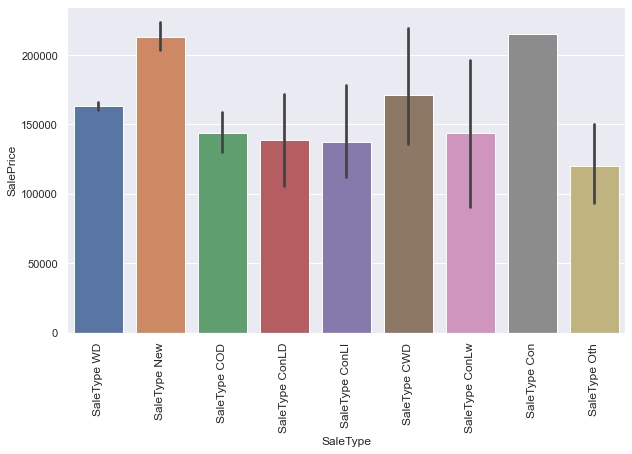

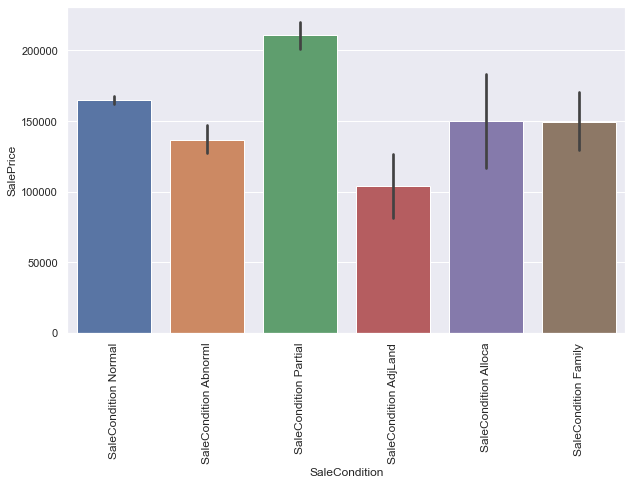

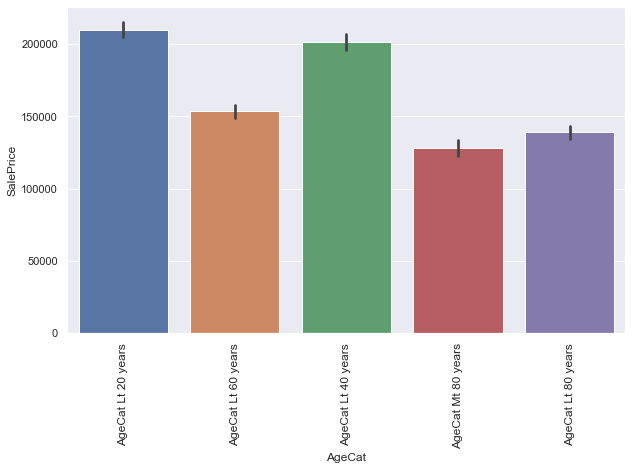

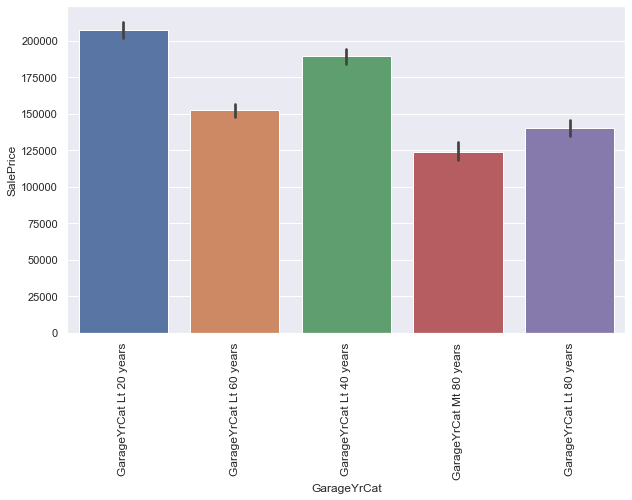

In [1772]:
sns.set(rc={'figure.figsize':(10,6)})

# Plot bar charts of categorical variables with the target variable
for col in objCols:
    sns.barplot(data=df,x=col,y="SalePrice")
    plt.xticks(fontsize=12,rotation=90)
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.show()

`Let's check if the correlation between numerical columns`

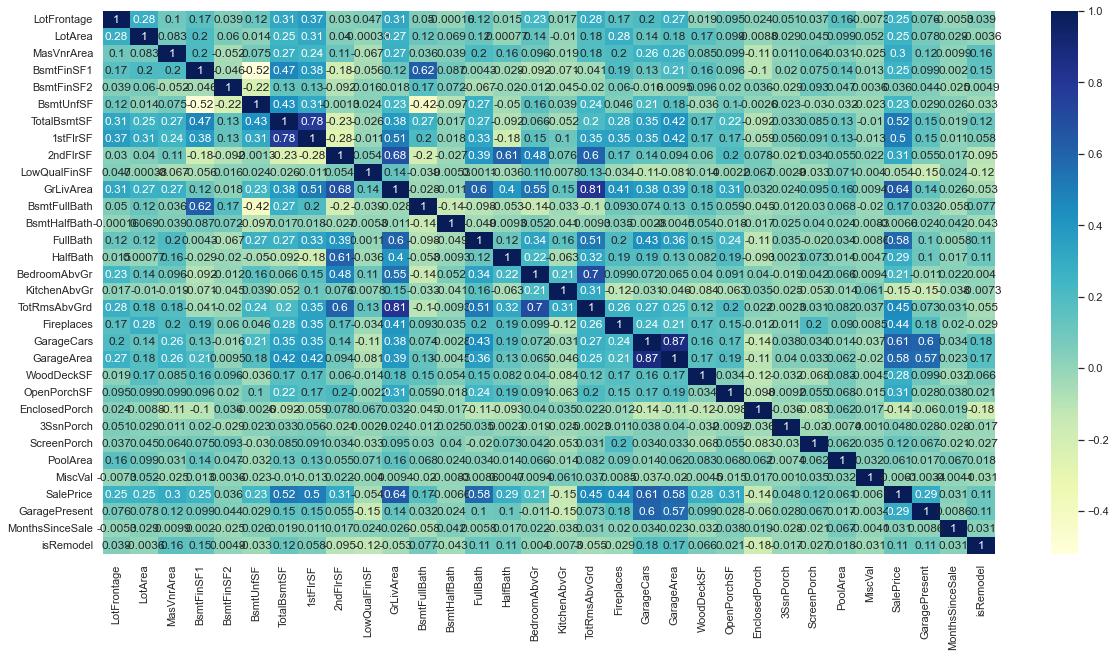

In [1773]:
sns.set(rc={'figure.figsize':(20,10)})

corrdf = df.corr()

sns.heatmap(corrdf,cmap="YlGnBu", annot=True)

plt.show()

`1stFlrSF is highly correlated with TotalBsmtSF. We will keep the later and remove the former. We will do same with all the variables having correlation values higher than 0.75 or lower than -0.75`

In [1774]:
# Remove the highly correlated columns
colsToDrop = ['1stFlrSF', 'GarageCars', 'TotRmsAbvGrd']
df.drop(colsToDrop,axis=1,inplace=True)

In [1775]:
df.shape

(1355, 75)

`Create dummy variables`

In [1776]:
for col in objCols:
    dummydf = pd.get_dummies(df[col],drop_first=True) # drop_first = True will remove the redundant column
    df= pd.concat([df, dummydf],axis=1)

print(df.shape)
df.head()

(1355, 326)


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleCondition Normal,SaleCondition Partial,AgeCat Lt 40 years,AgeCat Lt 60 years,AgeCat Lt 80 years,AgeCat Mt 80 years,GarageYrCat Lt 40 years,GarageYrCat Lt 60 years,GarageYrCat Lt 80 years,GarageYrCat Mt 80 years
0,MSSubClass 2-story-1946,MSZoning RL,65.0,8450,Alley None,LotShape Reg,LandContour Lvl,Utilities AllPub,LotConfig Inside,LandSlope Gtl,...,1,0,0,0,0,0,0,0,0,0
1,MSSubClass 1-story-1946,MSZoning RL,80.0,9600,Alley None,LotShape Reg,LandContour Lvl,Utilities AllPub,LotConfig FR2,LandSlope Gtl,...,1,0,0,1,0,0,0,1,0,0
2,MSSubClass 2-story-1946,MSZoning RL,68.0,11250,Alley None,LotShape IR1,LandContour Lvl,Utilities AllPub,LotConfig Inside,LandSlope Gtl,...,1,0,1,0,0,0,1,0,0,0
3,MSSubClass 2-story-1945,MSZoning RL,60.0,9550,Alley None,LotShape IR1,LandContour Lvl,Utilities AllPub,LotConfig Corner,LandSlope Gtl,...,0,0,0,0,0,1,1,0,0,0
4,MSSubClass 2-story-1946,MSZoning RL,84.0,14260,Alley None,LotShape IR1,LandContour Lvl,Utilities AllPub,LotConfig FR2,LandSlope Gtl,...,1,0,1,0,0,0,1,0,0,0


In [1777]:
df.drop(objCols,axis=1,inplace=True)
df.shape

(1355, 280)

In [1778]:
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleCondition Normal,SaleCondition Partial,AgeCat Lt 40 years,AgeCat Lt 60 years,AgeCat Lt 80 years,AgeCat Mt 80 years,GarageYrCat Lt 40 years,GarageYrCat Lt 60 years,GarageYrCat Lt 80 years,GarageYrCat Mt 80 years
0,65.0,8450,196.0,706,0,150,856,854,0,1710,...,1,0,0,0,0,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,0,0,1262,...,1,0,0,1,0,0,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,866,0,1786,...,1,0,1,0,0,0,1,0,0,0
3,60.0,9550,0.0,216,0,540,756,756,0,1717,...,0,0,0,0,0,1,1,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1053,0,2198,...,1,0,1,0,0,0,1,0,0,0


#### Train test split of data

In [1779]:
df_train, df_test = train_test_split(df, train_size= 0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(948, 280)
(407, 280)


In [1780]:
# Separate X and y components for train and test data
y_train = df_train.pop('SalePrice')
X_train = df_train.copy(deep=True)
y_test = df_test.pop('SalePrice')
X_test = df_test.copy(deep=True)

In [1781]:
numCols = list(X_train.select_dtypes(include=['int64','float64']).columns)

In [1782]:
# scaling the data
scaler = MinMaxScaler()
X_train[numCols] = scaler.fit_transform(X_train[numCols])
X_train[numCols].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GaragePresent,MonthsSinceSale,isRemodel
438,0.065068,0.017177,0.0,0.161504,0.0,0.036729,0.140217,0.000000,0.0,0.051001,...,0.000000,0.000000,0.061594,0.0,0.000000,0.0,0.0,1.0,0.740741,0.0
602,0.202055,0.052481,0.0,0.349115,0.0,0.058276,0.289356,0.543454,0.0,0.341992,...,0.163043,0.286807,0.000000,0.0,0.000000,0.0,0.0,1.0,0.981481,1.0
658,0.195205,0.098209,0.0,0.000000,0.0,0.446621,0.290631,0.300330,0.0,0.233079,...,0.260870,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,0.111111,0.0
588,0.150685,0.144733,0.0,0.585841,0.0,0.055338,0.457935,0.000000,0.0,0.236654,...,0.000000,0.091778,0.000000,0.0,0.151515,0.0,0.0,1.0,0.240741,0.0
1391,0.150685,0.045758,0.0,0.000000,0.0,0.775710,0.504780,0.000000,0.0,0.263108,...,0.000000,0.290631,0.000000,0.0,0.000000,0.0,0.0,1.0,0.277778,1.0


In [1783]:
X_test[numCols] = scaler.transform(X_test[numCols]) # scale test data

In [1784]:
y_train.head()

438      90350
602     220000
658      97500
588     143000
1391    124000
Name: SalePrice, dtype: int64

#### We will create three models: 
-  Linear Regression With Hyperparameter (no. of features) tuning
-  Ridge Regression
-  Lasso Regression

### Linear regression with hyperparameter tuning

In [1785]:
# create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 20))}]


# perform grid search
## specify model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
rfe = RFE(linreg)             

## call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)   

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19]}],
             return_train_score=True, scoring='r2', verbose=1)

In [1786]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.363912,0.556720,0.014290,0.004555,1,{'n_features_to_select': 1},0.501765,0.487236,0.482882,0.350923,...,0.425277,0.081666,18,0.428424,0.431610,0.423392,0.461666,0.468891,0.442797,0.018683
1,5.889316,1.248564,0.010083,0.001712,2,{'n_features_to_select': 2},0.507839,0.492922,0.491393,0.334397,...,0.417143,0.101277,19,0.453438,0.456811,0.449732,0.490267,0.619141,0.493878,0.064284
2,5.466360,0.879511,0.010500,0.001884,3,{'n_features_to_select': 3},0.574785,0.592314,0.653994,0.334397,...,0.499430,0.134405,17,0.606097,0.602153,0.578004,0.490267,0.676167,0.590538,0.059868
3,6.051407,0.983828,0.012281,0.001692,4,{'n_features_to_select': 4},0.574785,0.592314,0.653994,0.581516,...,0.567976,0.071141,16,0.606097,0.602153,0.578004,0.601723,0.722642,0.622124,0.051230
4,6.785601,0.592827,0.013028,0.001439,5,{'n_features_to_select': 5},0.646623,0.629779,0.724052,0.638236,...,0.615286,0.094944,15,0.669054,0.672252,0.641601,0.668482,0.724724,0.675223,0.027104


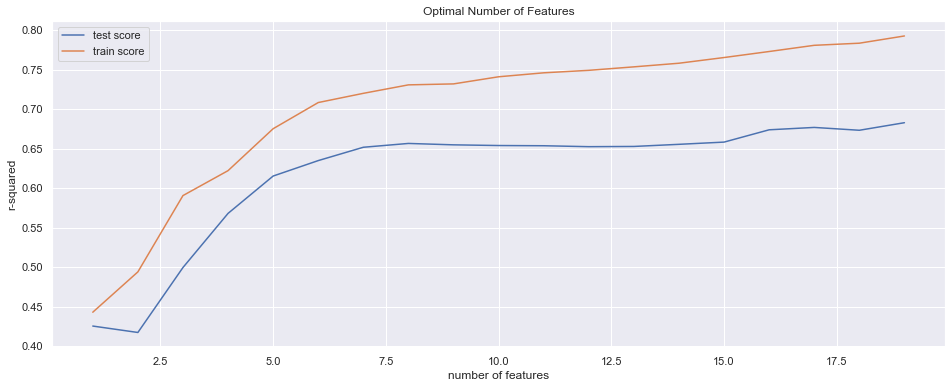

In [1787]:
#plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

`From above plot we can see that the number of features that gives best results for both train and test is 8`

In [1788]:
n_features_optimal = 8

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

In [1789]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [1790]:
lm = LinearRegression()

lm.fit(X_train_rfe, y_train)

print(lm.coef_)
print(X_train_rfe.columns)
print(lm.intercept_)

[ 133526.95388707  277170.14350937 -109890.95116616   94831.62733119
 -158474.00414142 -158474.00414142   63597.60128269   38998.45337069]
Index(['TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea',
       'Condition2 PosN', 'OverallQual Very excellent', 'RoofMatl Membran',
       'RoofMatl Metal'],
      dtype='object')
30690.724871466955


In [1791]:
# function to calculate metrics like r2 score, rss of train and test, mse of train and test
def calculateMetrics(y_pred_train, y_pred_test):

    metricArr = []

    r2_train_lr = r2_score(y_train, y_pred_train)
    print("r2_train : {0}".format(r2_train_lr))
    metricArr.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print("r2_test : {0}".format(r2_test_lr))
    metricArr.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print("rss_train : {0}".format(rss1_lr))
    metricArr.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print("rss_test : {0}".format(rss2_lr))
    metricArr.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print("rmse_train : {0}".format(mse_train_lr**0.5))
    metricArr.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print("rmse_test: {0}".format(mse_test_lr**0.5))
    metricArr.append(mse_test_lr**0.5)
    
    return metricArr



In [1792]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)
metric = calculateMetrics(y_pred_train, y_pred_test)

r2_train : 0.717045812803164
r2_test : 0.5156019264200689
rss_train : 751396114608.8384
rss_test : 573843242510.8594
rmse_train : 28153.36454567004
rmse_test: 37549.09129104776


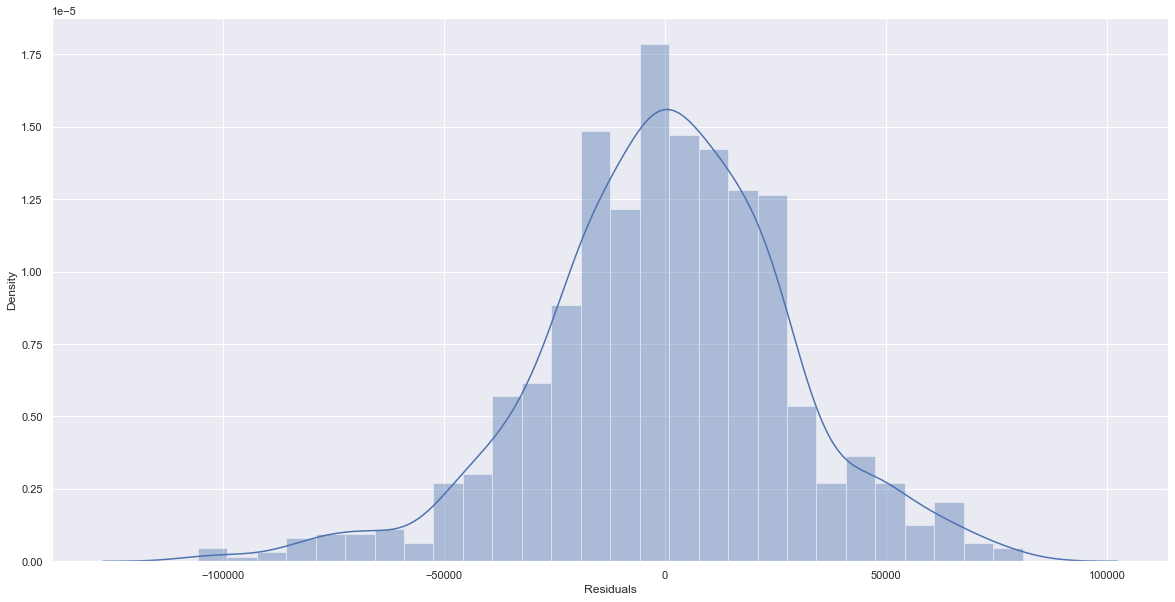

In [1793]:
res = y_train - y_pred_train
sns.distplot(res)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

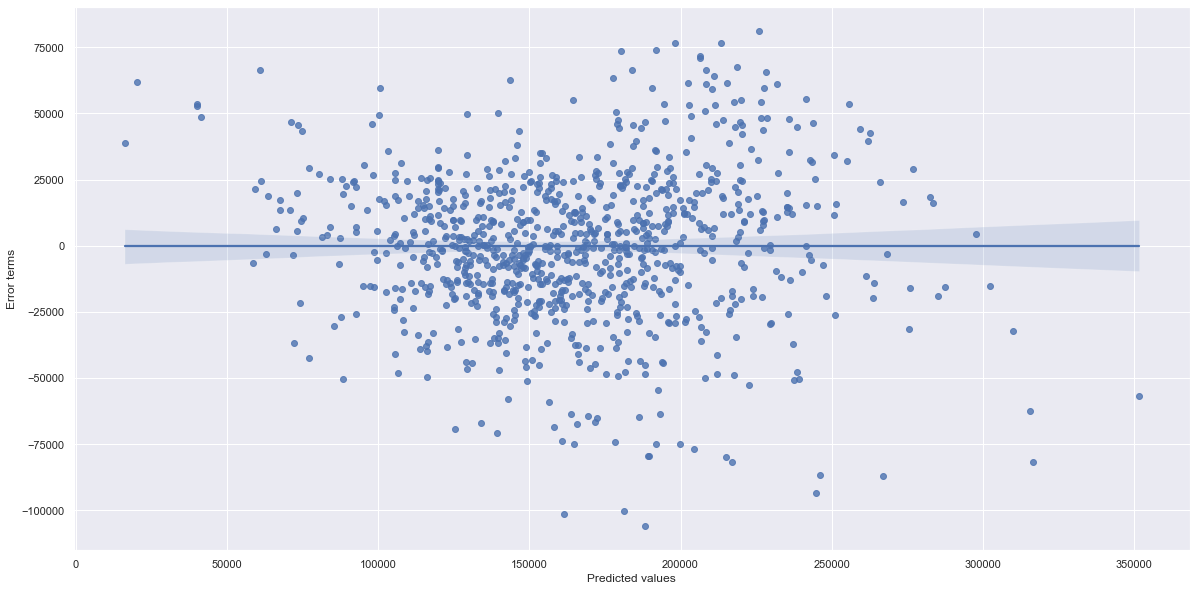

In [1794]:
sns.regplot(x=y_pred_train, y = res)
plt.xlabel('Predicted values')
plt.ylabel('Error terms')
plt.show()

`We can see that error terms are normally distributed around 0 and there is no pattern as such in error terms. The assumptions of linear regression does fit well`

### Ridge regression

In [1795]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1796]:
print(model_cv.best_params_)

{'alpha': 1.0}


`The best alpha is 1 for ridge regression is identified with hyperparameter tuning`

In [1797]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.03880159e+04  3.84845667e+04  5.47409618e+03  3.78438925e+04
  2.00518519e+04  1.16523551e+04  4.42567673e+04  2.26568301e+04
  1.47211687e+03  8.69701008e+04  9.59815819e+03 -1.43828546e+03
  2.15398447e+04  6.55642856e+03  1.44702365e+04 -1.94803299e+04
  1.21527591e+04  3.91832342e+04  9.86594734e+03  4.42502134e+03
  6.69132528e+03  3.37341942e+03  1.77212025e+04 -8.88200526e+02
  5.85843137e+03  7.09354075e+02  3.17414942e+03 -2.80727278e+03
 -2.32760899e+03 -1.45212506e+03  5.55609705e+03  1.00043227e+03
 -3.60810673e+03  4.06401593e+03 -2.62155783e+03  2.20587130e+03
  8.58940112e+03 -8.05955383e+03  6.60507448e+03  1.46104361e+03
 -1.48220020e+02 -5.12629622e+02  1.12059435e+04  1.77296827e+04
  2.21741582e+04  1.48603649e+04  9.43852039e+02  1.24978567e+03
  7.43550868e+03  1.38332936e+04  5.04748995e+02  1.78351100e+03
 -1.13915412e+03 -4.81343383e+01 -1.87161857e+04  7.37118323e+03
 -6.78699570e+03 -4.85827546e+03 -1.65720434e+03 -2.99147274e+02
 -2.59339537e+04  2.17250

In [1798]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
metric2 = calculateMetrics(y_pred_train, y_pred_test)

r2_train : 0.939556026640864
r2_test : 0.7818852848738354
rss_train : 160511378833.14124
rss_test : 258390076662.17993
rmse_train : 13012.140502503808
rmse_test: 25196.528594709813


`We see that train r2 score is really good while r2 score is not that great, although it is decently good. There is some overfitting`

In [1799]:
# function to find top n features based on betas absolute value
def findTopFeatures(features, betas, n = 5):
    resultdf = pd.DataFrame({'features' : features, 'betas' : betas})
    # imp to convert all betas to positive, since without this step, sort will push all negative betas to the last rows
    resultdf['absoluteBetas'] = resultdf['betas'].apply(lambda x: x if x >= 0 else -1*x)
    resultdf.sort_values(by=['absoluteBetas'],ascending=False, inplace=True)
    topFeatures = list(resultdf.iloc[0:n, 0])
    print(resultdf[resultdf['features'].isin(topFeatures)][['features','betas']])
    return topFeatures

In [1800]:
findTopFeatures(X_train.columns, ridge.coef_, 8)

                       features         betas
9                     GrLivArea  86970.100839
95              Condition2 PosN -62435.497050
117  OverallQual Very excellent -62435.497050
6                   TotalBsmtSF  44256.767313
17                   GarageArea  39183.234185
1                       LotArea  38484.566718
3                    BsmtFinSF1  37843.892489
112       OverallQual Excellent  31551.113682


['GrLivArea',
 'Condition2 PosN',
 'OverallQual Very excellent',
 'TotalBsmtSF',
 'GarageArea',
 'LotArea',
 'BsmtFinSF1',
 'OverallQual Excellent']

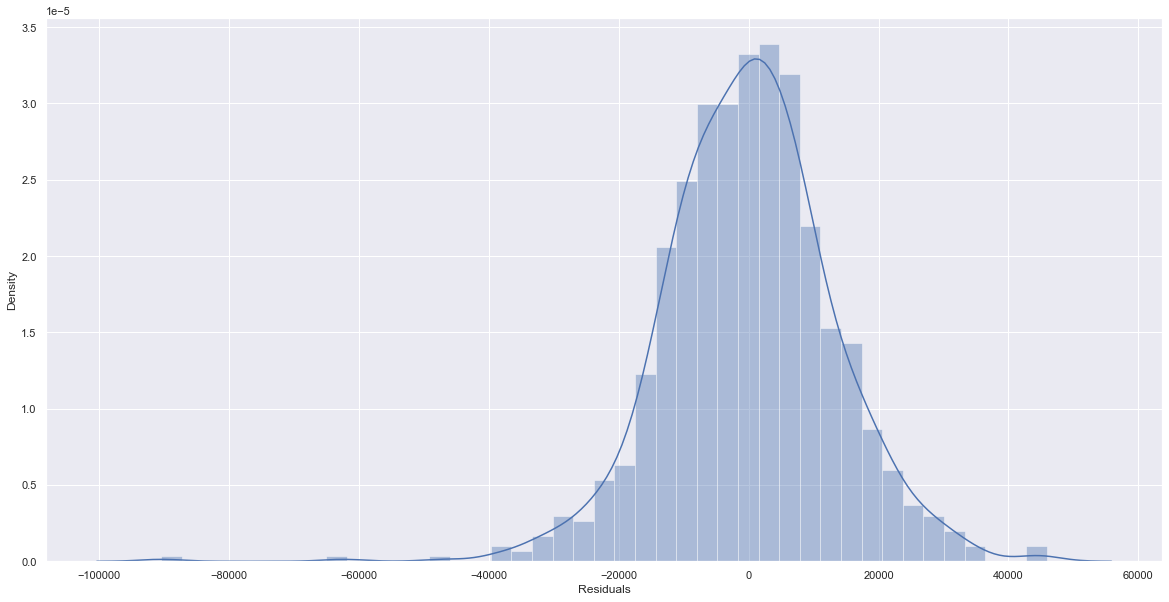

In [1801]:
res = y_train - y_pred_train
sns.distplot(res)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

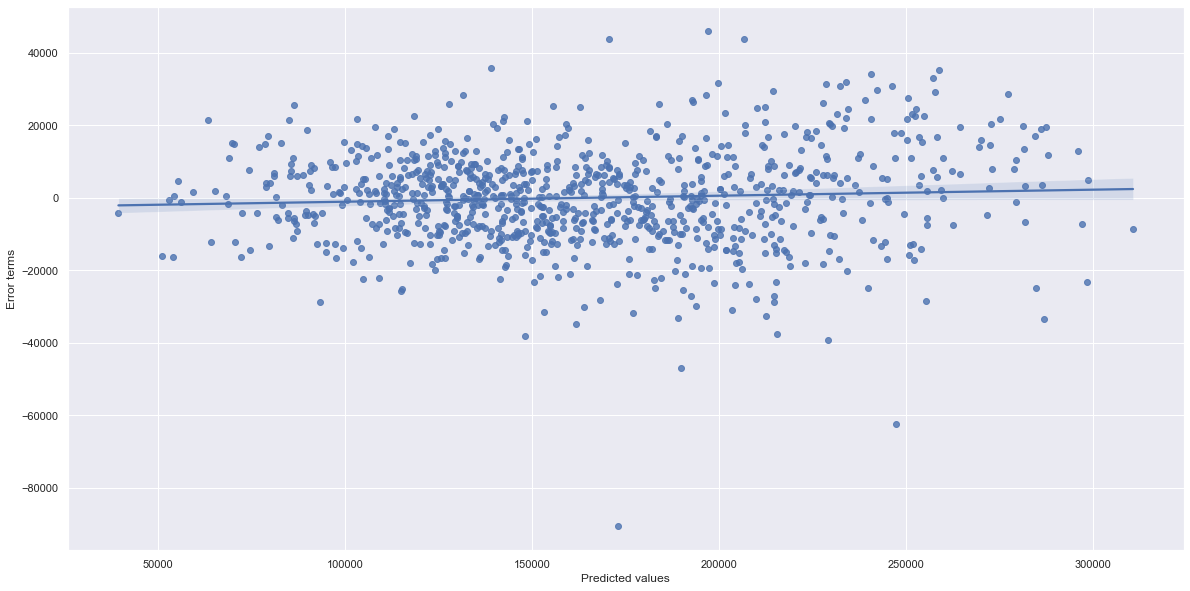

In [1802]:
sns.regplot(x=y_pred_train, y = res)
plt.xlabel('Predicted values')
plt.ylabel('Error terms')
plt.show()

### Lasso regression

In [1803]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1804]:
print(model_cv.best_params_)

{'alpha': 50}


In [1805]:
alpha = 50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

lasso.coef_

array([ 0.00000000e+00,  2.99210895e+04,  0.00000000e+00,  2.72722312e+04,
        1.39783016e+04, -0.00000000e+00,  4.14756901e+04,  0.00000000e+00,
       -0.00000000e+00,  1.64971476e+05,  8.34986683e+03, -0.00000000e+00,
        1.33362761e+04,  1.27014560e+03,  0.00000000e+00, -1.91508119e+04,
        4.00050325e+03,  3.66782204e+04,  6.35653498e+03,  8.16720117e+02,
        0.00000000e+00, -0.00000000e+00,  1.32866403e+04, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.61569395e+03, -9.94625850e+02,
        0.00000000e+00, -1.02506202e+03,  4.60362156e+03, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  8.93400563e+02,
        9.02130357e+03, -9.23048036e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.29351410e+02,  0.00000000e+00,  1.37733536e+03,
        8.89825668e+03,  3.89614626e+02,  0.00000000e+00,  0.00000000e+00,
        2.95806592e+03,  6.05536886e+03, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [1806]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
metric3 = calculateMetrics(y_pred_train, y_pred_test)

r2_train : 0.9311783011669326
r2_test : 0.7517425339692136
rss_train : 182758762527.06946
rss_test : 294098752771.21295
rmse_train : 13884.64996949472
rmse_test: 26881.245472638137


In [1807]:
findTopFeatures(X_train.columns, lasso.coef_,8)

                  features          betas
95         Condition2 PosN -172548.863948
9                GrLivArea  164971.476120
6              TotalBsmtSF   41475.690090
17              GarageArea   36678.220434
1                  LotArea   29921.089492
112  OverallQual Excellent   29213.740504
3               BsmtFinSF1   27272.231180
118  OverallQual Very good   27147.130434


['Condition2 PosN',
 'GrLivArea',
 'TotalBsmtSF',
 'GarageArea',
 'LotArea',
 'OverallQual Excellent',
 'BsmtFinSF1',
 'OverallQual Very good']

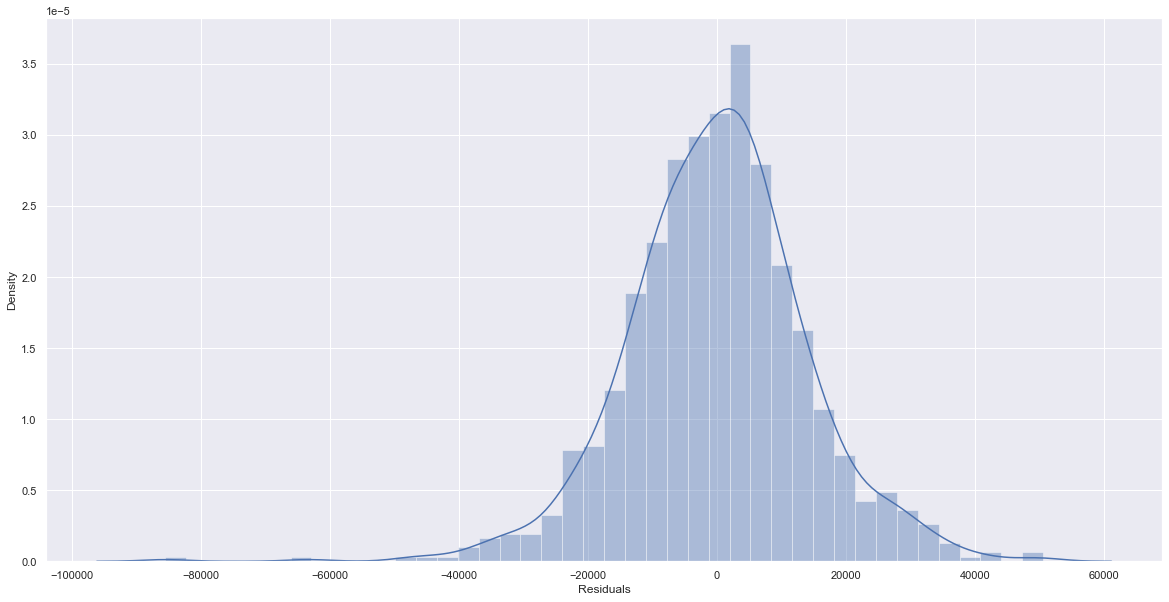

In [1808]:
res = y_train - y_pred_train
sns.distplot(res)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

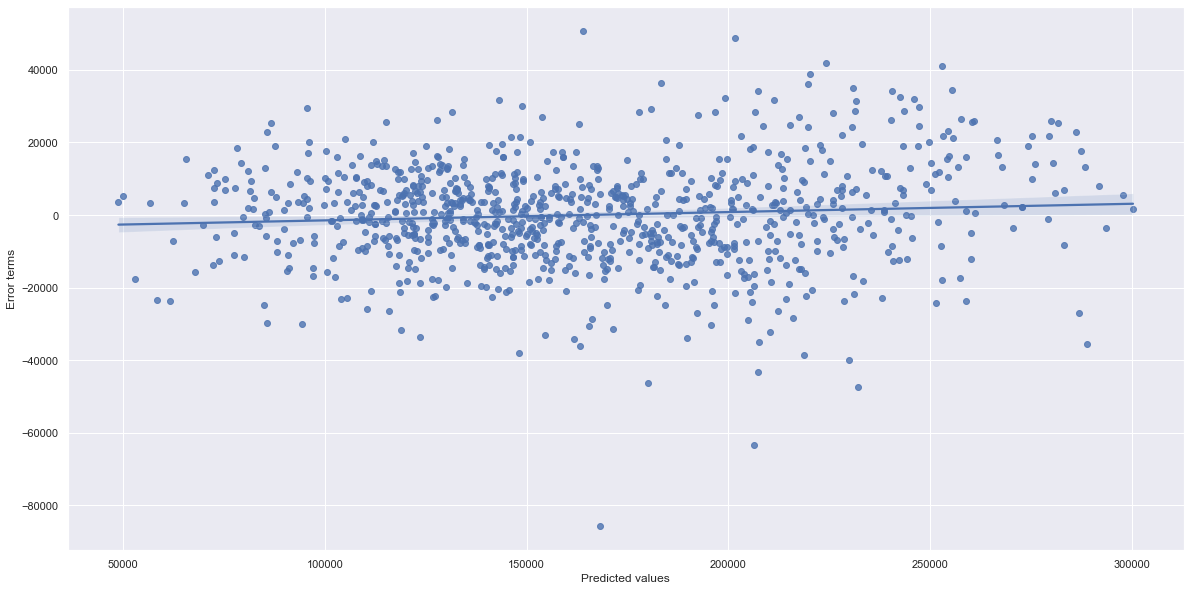

In [1809]:
sns.regplot(x=y_pred_train, y = res)
plt.xlabel('Predicted values')
plt.ylabel('Error terms')
plt.show()

`We will do further experiments to find answers to some subjective questions given in the assignment`

`Once we have all the models, then we will choose the best one`

### Doubling alpha for both Ridge and Lasso

#### Ridge

In [1810]:
ridge2 = Ridge(alpha=2)

ridge2.fit(X_train, y_train)

Ridge(alpha=2)

In [1811]:
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)
metric4 = calculateMetrics(y_pred_train, y_pred_test)

r2_train : 0.9323039906796782
r2_test : 0.7930183150901166
rss_train : 179769449188.00024
rss_test : 245201307947.50012
rmse_train : 13770.628913105149
rmse_test: 24545.06500474635


In [1812]:
findTopFeatures(X_train.columns, ridge2.coef_,8)

                       features         betas
9                     GrLivArea  66868.279309
95              Condition2 PosN -41865.544196
117  OverallQual Very excellent -41865.544196
6                   TotalBsmtSF  39952.851492
17                   GarageArea  37064.249158
3                    BsmtFinSF1  33881.423993
112       OverallQual Excellent  27642.669888
118       OverallQual Very good  26458.173058


['GrLivArea',
 'Condition2 PosN',
 'OverallQual Very excellent',
 'TotalBsmtSF',
 'GarageArea',
 'BsmtFinSF1',
 'OverallQual Excellent',
 'OverallQual Very good']

`After doubling the alpha, the changes in r2 score of train and test data is very minor. But r2 score for test data is increased nonetheless. So overall, for all general purpose, this is a better model than ridge with alpha = 1`

`LotArea is demoted from top 8 features, rather 'OverallQual Very good' moves into top 8 features. Though the most important predictor remained same - GrLivArea, although the coefficients have been shrinked to smaller values`

#### Lasso

In [1813]:
lasso100 = Lasso(alpha=100)
        
lasso100.fit(X_train, y_train) 

Lasso(alpha=100)

In [1814]:
y_pred_train = lasso100.predict(X_train)
y_pred_test = lasso100.predict(X_test)
metric5 = calculateMetrics(y_pred_train, y_pred_test)

r2_train : 0.916379712822489
r2_test : 0.7827708847125789
rss_train : 222057003326.64886
rss_test : 257340948866.77838
rmse_train : 15304.814447789793
rmse_test: 25145.324488918774


In [1815]:
findTopFeatures(X_train.columns, lasso100.coef_,8)

                  features          betas
9                GrLivArea  158856.177291
95         Condition2 PosN  -94146.307741
6              TotalBsmtSF   36406.318411
17              GarageArea   36210.553507
118  OverallQual Very good   29532.701291
112  OverallQual Excellent   25973.805154
3               BsmtFinSF1   22745.770613
81    Neighborhood Somerst   17406.228417


['GrLivArea',
 'Condition2 PosN',
 'TotalBsmtSF',
 'GarageArea',
 'OverallQual Very good',
 'OverallQual Excellent',
 'BsmtFinSF1',
 'Neighborhood Somerst']

`As we can see, for lasso regression model, after doubling the alpha - the r2 score for train went down a little bit. But surprisingly the r2 score for test data increased by 2-3%. Also, the betas have shrinked a bit as well, which is understandable.`

#### Next goal is to find 5 most next important predictors after removing the top 5 predictors from lasso regression

In [1816]:
lassoTop5Features = findTopFeatures(X_train.columns, lasso.coef_)
print(lassoTop5Features)


           features          betas
95  Condition2 PosN -172548.863948
9         GrLivArea  164971.476120
6       TotalBsmtSF   41475.690090
17       GarageArea   36678.220434
1           LotArea   29921.089492
['Condition2 PosN', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'LotArea']


In [1817]:
X_train_modified = X_train.drop(lassoTop5Features,axis=1)
X_train_modified.shape

(948, 274)

In [1818]:
lassoNext5 = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lassoNext5, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_modified, y_train) 
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 50}


In [1819]:
alpha = 50

lassoNext5 = Lasso(alpha=alpha)
        
lassoNext5.fit(X_train_modified, y_train) 

Lasso(alpha=50)

In [1820]:
X_test_modified = X_test[X_train_modified.columns]
X_test_modified.shape

(407, 274)

In [1821]:
y_pred_train = lassoNext5.predict(X_train_modified)
y_pred_test = lassoNext5.predict(X_test_modified)
metric6 = calculateMetrics(y_pred_train, y_pred_test)

r2_train : 0.9145308672280499
r2_test : 0.8213974018779502
rss_train : 226966686445.09235
rss_test : 211581960410.72607
rmse_train : 15473.084240465592
rmse_test: 22800.38150089929


In [1822]:
findTopFeatures(X_train_modified.columns, lassoNext5.coef_)

                       features          betas
112  OverallQual Very excellent -136389.263422
2                    BsmtFinSF1  102134.476821
4                     BsmtUnfSF   64772.073034
3                    BsmtFinSF2   60691.216074
5                      2ndFlrSF   55738.244854


['OverallQual Very excellent',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'BsmtFinSF2',
 '2ndFlrSF']

In [1823]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

linreg_metric = pd.Series(metric, name = 'Linear Regression')
rga1_metric = pd.Series(metric2, name = 'Ridge Regression alpha 1')
la50_metric = pd.Series(metric3, name = 'Lasso Regression alpha 50')
rga2_metric = pd.Series(metric4, name = 'Ridge Regression alpha 2')
la100_metric = pd.Series(metric5, name = 'Lasso Regression alpha 100')
laNext5_metric = pd.Series(metric6, name = 'Lasso Regression alpha 50 Next top 5')

final_metric = pd.concat([lr_metric,linreg_metric, rga1_metric, la50_metric, rga2_metric, la100_metric, laNext5_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression alpha 1,Lasso Regression alpha 50,Ridge Regression alpha 2,Lasso Regression alpha 100,Lasso Regression alpha 50 Next top 5
0,R2 Score (Train),7.170458e-01,9.395560e-01,9.311783e-01,9.323040e-01,9.163797e-01,9.145309e-01
1,R2 Score (Test),5.156019e-01,7.818853e-01,7.517425e-01,7.930183e-01,7.827709e-01,8.213974e-01
2,RSS (Train),7.513961e+11,1.605114e+11,1.827588e+11,1.797694e+11,2.220570e+11,2.269667e+11
3,RSS (Test),5.738432e+11,2.583901e+11,2.940988e+11,2.452013e+11,2.573409e+11,2.115820e+11
4,RMSE (Train),2.815336e+04,1.301214e+04,1.388465e+04,1.377063e+04,1.530481e+04,1.547308e+04
5,RMSE (Test),3.754909e+04,2.519653e+04,2.688125e+04,2.454507e+04,2.514532e+04,2.280038e+04


Based on above data, I will chose Ridge regression model with alpha = 2 over other models for this dataset, since R2 score for test dataset is better than most of the models other than the lasso model after removing top 5 features. I am not considering the last model since it has removed the top 5 predictors. Also ridge with alpha 2 has a good train score as well and it handled the overfitting pretty well.
There is definite overfitting in all the models, but ridge and lasso does reduce that overfitting by small margin compared to normal linear regression

### Final model equation (Ridge regression with alpha = 2)

`SalePrice = 66868xGrLivArea - 41866xCondition2 PosN - 41866xOverallQual Very excellent + 39953xTotalBsmtSF + 37064xGarageArea + 33881xBsmtFinSF1 + 27643xOverallQual Excellent + 26458xOverallQual Very good`

Please note that I have rounded off the betas to integer and selected the top 8 features here to make it easier to understand

Top features in our models are : Above grade living area square ft, Near positive off-site feature, Overall material and finish of the house, Size of garage, basement finish area

So this model tells that if we keep all other variables constant and increase GrLivArea by 1 unit, the sale price of the house would increase by 66868 units. Similarly if Condition2 PosN is increased by 1 unit keeping all variables constant, then house's sale price would decrease by 41866 units.

#### Optimal values of lambda for ridge and lasso

Through hyperparameter tuning and cross validation we found that the perfect values of lambda and for ridge and lasso are 1 and 50 respectively. But when we doubled the value of alpha for both, we got slightly better models. The reason could be that hyperparameter tuning decides lambda based on cross validating training data, but actual test data gives better result with a different alpha.

So the optimal values of lambda for ridge and lasso are 2 and 100 respectively